In [11]:

import pandas as pd

infname = 'iris.data'
cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
alldf = pd.read_csv(infname, names=cols)
print(alldf)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [12]:

import numpy as np

len1 = len(alldf)
mask = np.random.rand(len1)<0.8
train_df = alldf[mask]
test_df = alldf[~mask]
print(test_df)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width            Class
6             4.6          3.4           1.4          0.3      Iris-setosa
8             4.4          2.9           1.4          0.2      Iris-setosa
11            4.8          3.4           1.6          0.2      Iris-setosa
21            5.1          3.7           1.5          0.4      Iris-setosa
25            5.0          3.0           1.6          0.2      Iris-setosa
29            4.7          3.2           1.6          0.2      Iris-setosa
41            4.5          2.3           1.3          0.3      Iris-setosa
45            4.8          3.0           1.4          0.3      Iris-setosa
49            5.0          3.3           1.4          0.2      Iris-setosa
56            6.3          3.3           4.7          1.6  Iris-versicolor
57            4.9          2.4           3.3          1.0  Iris-versicolor
85            6.0          3.4           4.5          1.6  Iris-versicolor
88            5.6        

In [13]:

import numpy as np
from sklearn import preprocessing

dic1 = {'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}
test_df['Class'] = test_df['Class'].map(dic1).astype(int)
print(test_df)
print('='*80)
np_array = test_df.values
data = np_array[:, :-1]
print(data)
print('='*80)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
print(scaled_data)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
6             4.6          3.4           1.4          0.3      0
8             4.4          2.9           1.4          0.2      0
11            4.8          3.4           1.6          0.2      0
21            5.1          3.7           1.5          0.4      0
25            5.0          3.0           1.6          0.2      0
29            4.7          3.2           1.6          0.2      0
41            4.5          2.3           1.3          0.3      0
45            4.8          3.0           1.4          0.3      0
49            5.0          3.3           1.4          0.2      0
56            6.3          3.3           4.7          1.6      1
57            4.9          2.4           3.3          1.0      1
85            6.0          3.4           4.5          1.6      1
88            5.6          3.0           4.1          1.3      1
92            5.8          2.6           4.0          1.2      1
93            5.0        

<ipython-input-13-27fbeb632a66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Class'] = test_df['Class'].map(dic1).astype(int)


In [14]:

import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

def featureEngineering(df):
    dic1 = {'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}
    df['Class'] = df['Class'].map(dic1).astype(int)
    np_array = df.values
    data = np_array[:, :-1]
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    labels = np_array[:, -1]
    labels = to_categorical(labels)
    return scaled_data, labels

infname = 'iris.data'
cols = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
alldf = pd.read_csv(infname, names=cols)
#print(alldf)

len1 = len(alldf)
mask = np.random.rand(len1)<0.8
train_df = alldf[mask]
test_df = alldf[~mask]
#print(test_df)

train_data, train_labels = featureEngineering(train_df)
test_data, test_labels = featureEngineering(test_df)
print(test_labels)


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


<ipython-input-14-74fe0876cf67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df['Class'].map(dic1).astype(int)
<ipython-input-14-74fe0876cf67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df['Class'].map(dic1).astype(int)


In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(128, activation=('sigmoid'), input_shape=(4,)))
model.add(Dense(32, activation=('sigmoid')))
model.add(Dense(3, activation=('softmax')))
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 4,867
Trainable params: 4,867
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\user\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:

import matplotlib.pyplot as plt

train_history = model.fit(train_data, train_labels, validation_split=0.2, epochs=750, batch_size=30)


Epoch 1/750
3/3 [==============================] - 1s 162ms/step - loss: 1.1037 - acc: 0.4000 - val_loss: 1.2043 - val_acc: 0.0000e+00
Epoch 2/750
3/3 [==============================] - 0s 12ms/step - loss: 1.0627 - acc: 0.4000 - val_loss: 1.4469 - val_acc: 0.0000e+00
Epoch 3/750
3/3 [==============================] - 0s 10ms/step - loss: 1.0225 - acc: 0.4444 - val_loss: 1.7264 - val_acc: 0.0000e+00
Epoch 4/750
3/3 [==============================] - 0s 10ms/step - loss: 1.0081 - acc: 0.4444 - val_loss: 1.9717 - val_acc: 0.0000e+00
Epoch 5/750
3/3 [==============================] - 0s 11ms/step - loss: 1.0127 - acc: 0.4444 - val_loss: 2.1354 - val_acc: 0.0000e+00
Epoch 6/750
3/3 [==============================] - 0s 11ms/step - loss: 1.0167 - acc: 0.4444 - val_loss: 2.2023 - val_acc: 0.0000e+00
Epoch 7/750
3/3 [==============================] - 0s 9ms/step - loss: 1.0219 - acc: 0.4444 - val_loss: 2.2131 - val_acc: 0.0000e+00
Epoch 8/750
3/3 [==============================] - 0s 10ms/ste

Epoch 62/750
3/3 [==============================] - 0s 10ms/step - loss: 0.9615 - acc: 0.5000 - val_loss: 1.7959 - val_acc: 0.0000e+00
Epoch 63/750
3/3 [==============================] - 0s 11ms/step - loss: 0.9601 - acc: 0.5000 - val_loss: 1.7945 - val_acc: 0.0000e+00
Epoch 64/750
3/3 [==============================] - 0s 11ms/step - loss: 0.9591 - acc: 0.4889 - val_loss: 1.7828 - val_acc: 0.0000e+00
Epoch 65/750
3/3 [==============================] - 0s 11ms/step - loss: 0.9592 - acc: 0.5222 - val_loss: 1.7692 - val_acc: 0.0000e+00
Epoch 66/750
3/3 [==============================] - 0s 11ms/step - loss: 0.9564 - acc: 0.5444 - val_loss: 1.7674 - val_acc: 0.0000e+00
Epoch 67/750
3/3 [==============================] - 0s 11ms/step - loss: 0.9563 - acc: 0.7444 - val_loss: 1.7707 - val_acc: 0.0000e+00
Epoch 68/750
3/3 [==============================] - 0s 11ms/step - loss: 0.9532 - acc: 0.8222 - val_loss: 1.7824 - val_acc: 0.0000e+00
Epoch 69/750
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 10ms/step - loss: 0.7925 - acc: 0.8222 - val_loss: 1.5912 - val_acc: 0.0000e+00
Epoch 123/750
3/3 [==============================] - 0s 10ms/step - loss: 0.7857 - acc: 0.8222 - val_loss: 1.5666 - val_acc: 0.0000e+00
Epoch 124/750
3/3 [==============================] - 0s 10ms/step - loss: 0.7807 - acc: 0.8444 - val_loss: 1.5774 - val_acc: 0.0000e+00
Epoch 125/750
3/3 [==============================] - 0s 10ms/step - loss: 0.7744 - acc: 0.8444 - val_loss: 1.5733 - val_acc: 0.0000e+00
Epoch 126/750
3/3 [==============================] - ETA: 0s - loss: 0.8058 - acc: 0.833 - 0s 11ms/step - loss: 0.7697 - acc: 0.8444 - val_loss: 1.5710 - val_acc: 0.0000e+00
Epoch 127/750
3/3 [==============================] - 0s 10ms/step - loss: 0.7637 - acc: 0.8444 - val_loss: 1.5603 - val_acc: 0.0000e+00
Epoch 128/750
3/3 [==============================] - 0s 11ms/step - loss: 0.7584 - acc: 0.8444 - val_loss: 1.5723 - val_acc: 0.0000e+00
Epoch 129/750
3/3 [=====

Epoch 182/750
3/3 [==============================] - 0s 14ms/step - loss: 0.4765 - acc: 0.8444 - val_loss: 1.2498 - val_acc: 0.0000e+00
Epoch 183/750
3/3 [==============================] - 0s 12ms/step - loss: 0.4718 - acc: 0.8444 - val_loss: 1.2507 - val_acc: 0.0000e+00
Epoch 184/750
3/3 [==============================] - 0s 12ms/step - loss: 0.4682 - acc: 0.8444 - val_loss: 1.2503 - val_acc: 0.0000e+00
Epoch 185/750
3/3 [==============================] - 0s 11ms/step - loss: 0.4647 - acc: 0.8444 - val_loss: 1.2593 - val_acc: 0.0000e+00
Epoch 186/750
3/3 [==============================] - 0s 9ms/step - loss: 0.4616 - acc: 0.8444 - val_loss: 1.2558 - val_acc: 0.0000e+00
Epoch 187/750
3/3 [==============================] - 0s 10ms/step - loss: 0.4579 - acc: 0.8444 - val_loss: 1.2450 - val_acc: 0.0000e+00
Epoch 188/750
3/3 [==============================] - 0s 10ms/step - loss: 0.4551 - acc: 0.8444 - val_loss: 1.2501 - val_acc: 0.0000e+00
Epoch 189/750
3/3 [==============================

3/3 [==============================] - 0s 13ms/step - loss: 0.3399 - acc: 0.8444 - val_loss: 1.0562 - val_acc: 0.0000e+00
Epoch 243/750
3/3 [==============================] - 0s 12ms/step - loss: 0.3373 - acc: 0.8444 - val_loss: 1.0380 - val_acc: 0.0000e+00
Epoch 244/750
3/3 [==============================] - 0s 12ms/step - loss: 0.3357 - acc: 0.8444 - val_loss: 1.0310 - val_acc: 0.0000e+00
Epoch 245/750
3/3 [==============================] - 0s 12ms/step - loss: 0.3345 - acc: 0.8444 - val_loss: 1.0160 - val_acc: 0.0000e+00
Epoch 246/750
3/3 [==============================] - 0s 12ms/step - loss: 0.3329 - acc: 0.8444 - val_loss: 1.0188 - val_acc: 0.0000e+00
Epoch 247/750
3/3 [==============================] - 0s 11ms/step - loss: 0.3313 - acc: 0.8444 - val_loss: 1.0205 - val_acc: 0.0000e+00
Epoch 248/750
3/3 [==============================] - 0s 11ms/step - loss: 0.3305 - acc: 0.8444 - val_loss: 1.0049 - val_acc: 0.0000e+00
Epoch 249/750
3/3 [==============================] - 0s 13ms/s

3/3 [==============================] - 0s 9ms/step - loss: 0.2642 - acc: 0.8889 - val_loss: 0.8583 - val_acc: 0.2609
Epoch 304/750
3/3 [==============================] - 0s 11ms/step - loss: 0.2632 - acc: 0.8889 - val_loss: 0.8611 - val_acc: 0.2609
Epoch 305/750
3/3 [==============================] - 0s 9ms/step - loss: 0.2620 - acc: 0.8889 - val_loss: 0.8559 - val_acc: 0.2609
Epoch 306/750
3/3 [==============================] - 0s 10ms/step - loss: 0.2610 - acc: 0.8889 - val_loss: 0.8475 - val_acc: 0.3043
Epoch 307/750
3/3 [==============================] - 0s 9ms/step - loss: 0.2605 - acc: 0.8889 - val_loss: 0.8570 - val_acc: 0.3043
Epoch 308/750
3/3 [==============================] - 0s 9ms/step - loss: 0.2596 - acc: 0.8889 - val_loss: 0.8247 - val_acc: 0.3478
Epoch 309/750
3/3 [==============================] - 0s 9ms/step - loss: 0.2580 - acc: 0.9000 - val_loss: 0.8167 - val_acc: 0.3478
Epoch 310/750
3/3 [==============================] - 0s 10ms/step - loss: 0.2580 - acc: 0.9111 

3/3 [==============================] - 0s 14ms/step - loss: 0.2059 - acc: 0.9333 - val_loss: 0.6688 - val_acc: 0.5652
Epoch 366/750
3/3 [==============================] - 0s 14ms/step - loss: 0.2053 - acc: 0.9333 - val_loss: 0.6776 - val_acc: 0.5652
Epoch 367/750
3/3 [==============================] - 0s 12ms/step - loss: 0.2046 - acc: 0.9333 - val_loss: 0.6733 - val_acc: 0.5652
Epoch 368/750
3/3 [==============================] - 0s 14ms/step - loss: 0.2034 - acc: 0.9333 - val_loss: 0.6760 - val_acc: 0.5652
Epoch 369/750
3/3 [==============================] - 0s 14ms/step - loss: 0.2025 - acc: 0.9333 - val_loss: 0.6697 - val_acc: 0.5652
Epoch 370/750
3/3 [==============================] - 0s 13ms/step - loss: 0.2017 - acc: 0.9333 - val_loss: 0.6665 - val_acc: 0.5652
Epoch 371/750
3/3 [==============================] - 0s 14ms/step - loss: 0.2009 - acc: 0.9333 - val_loss: 0.6657 - val_acc: 0.5652
Epoch 372/750
3/3 [==============================] - 0s 12ms/step - loss: 0.2000 - acc: 0.

3/3 [==============================] - 0s 12ms/step - loss: 0.1620 - acc: 0.9667 - val_loss: 0.5725 - val_acc: 0.6087
Epoch 428/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1616 - acc: 0.9667 - val_loss: 0.5725 - val_acc: 0.6087
Epoch 429/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1610 - acc: 0.9667 - val_loss: 0.5581 - val_acc: 0.6087
Epoch 430/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1602 - acc: 0.9667 - val_loss: 0.5470 - val_acc: 0.6087
Epoch 431/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1600 - acc: 0.9667 - val_loss: 0.5562 - val_acc: 0.6087
Epoch 432/750
3/3 [==============================] - 0s 13ms/step - loss: 0.1596 - acc: 0.9667 - val_loss: 0.5361 - val_acc: 0.6087
Epoch 433/750
3/3 [==============================] - 0s 12ms/step - loss: 0.1589 - acc: 0.9667 - val_loss: 0.5478 - val_acc: 0.6087
Epoch 434/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1584 - acc: 0.

3/3 [==============================] - 0s 10ms/step - loss: 0.1321 - acc: 0.9889 - val_loss: 0.4469 - val_acc: 0.7391
Epoch 490/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1306 - acc: 0.9889 - val_loss: 0.4716 - val_acc: 0.6957
Epoch 491/750
3/3 [==============================] - 0s 9ms/step - loss: 0.1299 - acc: 0.9889 - val_loss: 0.4870 - val_acc: 0.6522
Epoch 492/750
3/3 [==============================] - 0s 9ms/step - loss: 0.1296 - acc: 0.9889 - val_loss: 0.4922 - val_acc: 0.6522
Epoch 493/750
3/3 [==============================] - 0s 10ms/step - loss: 0.1292 - acc: 0.9889 - val_loss: 0.4881 - val_acc: 0.6522
Epoch 494/750
3/3 [==============================] - 0s 9ms/step - loss: 0.1287 - acc: 0.9889 - val_loss: 0.4713 - val_acc: 0.6957
Epoch 495/750
3/3 [==============================] - 0s 9ms/step - loss: 0.1283 - acc: 0.9889 - val_loss: 0.4693 - val_acc: 0.6957
Epoch 496/750
3/3 [==============================] - 0s 9ms/step - loss: 0.1282 - acc: 0.9889 

3/3 [==============================] - 0s 12ms/step - loss: 0.1083 - acc: 0.9889 - val_loss: 0.4163 - val_acc: 0.7391
Epoch 552/750
3/3 [==============================] - 0s 12ms/step - loss: 0.1081 - acc: 0.9889 - val_loss: 0.3994 - val_acc: 0.7826
Epoch 553/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1076 - acc: 0.9889 - val_loss: 0.3974 - val_acc: 0.7826
Epoch 554/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1084 - acc: 0.9889 - val_loss: 0.3858 - val_acc: 0.7826
Epoch 555/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1071 - acc: 0.9889 - val_loss: 0.3967 - val_acc: 0.7826
Epoch 556/750
3/3 [==============================] - 0s 10ms/step - loss: 0.1066 - acc: 0.9889 - val_loss: 0.4147 - val_acc: 0.7391
Epoch 557/750
3/3 [==============================] - 0s 12ms/step - loss: 0.1064 - acc: 0.9889 - val_loss: 0.4293 - val_acc: 0.7391
Epoch 558/750
3/3 [==============================] - 0s 11ms/step - loss: 0.1062 - acc: 0.

3/3 [==============================] - 0s 10ms/step - loss: 0.0916 - acc: 0.9889 - val_loss: 0.3660 - val_acc: 0.7826
Epoch 614/750
3/3 [==============================] - 0s 9ms/step - loss: 0.0913 - acc: 0.9889 - val_loss: 0.3636 - val_acc: 0.7826
Epoch 615/750
3/3 [==============================] - 0s 9ms/step - loss: 0.0917 - acc: 0.9889 - val_loss: 0.3503 - val_acc: 0.7826
Epoch 616/750
3/3 [==============================] - 0s 10ms/step - loss: 0.0910 - acc: 0.9889 - val_loss: 0.3564 - val_acc: 0.7826
Epoch 617/750
3/3 [==============================] - 0s 9ms/step - loss: 0.0908 - acc: 0.9889 - val_loss: 0.3696 - val_acc: 0.7826
Epoch 618/750
3/3 [==============================] - 0s 9ms/step - loss: 0.0906 - acc: 0.9889 - val_loss: 0.3825 - val_acc: 0.7826
Epoch 619/750
3/3 [==============================] - 0s 9ms/step - loss: 0.0903 - acc: 0.9889 - val_loss: 0.3826 - val_acc: 0.7826
Epoch 620/750
3/3 [==============================] - 0s 10ms/step - loss: 0.0899 - acc: 0.9889 

3/3 [==============================] - 0s 13ms/step - loss: 0.0788 - acc: 0.9889 - val_loss: 0.3332 - val_acc: 0.7826
Epoch 676/750
3/3 [==============================] - 0s 11ms/step - loss: 0.0791 - acc: 0.9889 - val_loss: 0.3272 - val_acc: 0.7826
Epoch 677/750
3/3 [==============================] - 0s 10ms/step - loss: 0.0788 - acc: 0.9889 - val_loss: 0.3393 - val_acc: 0.7826
Epoch 678/750
3/3 [==============================] - 0s 13ms/step - loss: 0.0783 - acc: 0.9889 - val_loss: 0.3385 - val_acc: 0.7826
Epoch 679/750
3/3 [==============================] - 0s 11ms/step - loss: 0.0781 - acc: 0.9889 - val_loss: 0.3414 - val_acc: 0.7826
Epoch 680/750
3/3 [==============================] - 0s 23ms/step - loss: 0.0788 - acc: 0.9889 - val_loss: 0.3592 - val_acc: 0.7826
Epoch 681/750
3/3 [==============================] - 0s 29ms/step - loss: 0.0778 - acc: 0.9889 - val_loss: 0.3525 - val_acc: 0.7826
Epoch 682/750
3/3 [==============================] - 0s 9ms/step - loss: 0.0775 - acc: 0.9

3/3 [==============================] - 0s 12ms/step - loss: 0.0690 - acc: 0.9889 - val_loss: 0.3373 - val_acc: 0.7826
Epoch 738/750
3/3 [==============================] - 0s 12ms/step - loss: 0.0689 - acc: 0.9889 - val_loss: 0.3279 - val_acc: 0.7826
Epoch 739/750
3/3 [==============================] - 0s 11ms/step - loss: 0.0685 - acc: 0.9889 - val_loss: 0.3294 - val_acc: 0.7826
Epoch 740/750
3/3 [==============================] - 0s 12ms/step - loss: 0.0684 - acc: 0.9889 - val_loss: 0.3199 - val_acc: 0.7826
Epoch 741/750
3/3 [==============================] - 0s 12ms/step - loss: 0.0681 - acc: 0.9889 - val_loss: 0.3130 - val_acc: 0.7826
Epoch 742/750
3/3 [==============================] - 0s 11ms/step - loss: 0.0682 - acc: 0.9889 - val_loss: 0.3035 - val_acc: 0.8696
Epoch 743/750
3/3 [==============================] - 0s 12ms/step - loss: 0.0683 - acc: 0.9889 - val_loss: 0.3016 - val_acc: 0.8696
Epoch 744/750
3/3 [==============================] - 0s 12ms/step - loss: 0.0677 - acc: 0.

<class 'dict'>
loss
acc
val_loss
val_acc
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

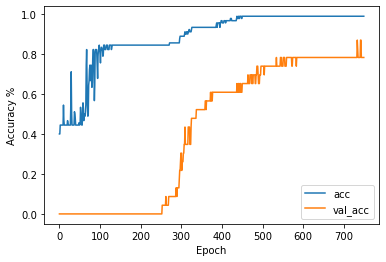

In [17]:
print(type(train_history.history))
for key in train_history.history:
    print(key)
print(train_history.history['val_acc'])

plt.plot(train_history.history['acc'], label='acc')
plt.plot(train_history.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend(loc='best')

plt.show()

In [35]:

test_loss, test_acc = model.evaluate(test_data, test_labels)
print(test_acc)


1/1 [==============================] - 0s 38ms/step - loss: 0.2007 - acc: 0.8800
0.8799999952316284
